<a href="https://colab.research.google.com/github/alberttuwan1/kagglefake-and-real-news-dataset/blob/main/Proyek_Akhir_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group 3<br>

1. 2540128114 - Raphael Alexander Lesmana - Computer Science & Mathematics
2. 2502052726 - Feelouis Elfredo - Computer Science & Mathematics
3. 2502001353 - Albert Gabriel Tuwan - Computer Science & Mathematics
4. 2540123725 - Yennifer Wilanata - Computer Science & Mathematics

Subject: Text Mining<br>
Class: LA05


---

Dataset used: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

#Prequisities

In [ ]:
# The dataset had already been uploaded to github before.
!wget 'https://github.com/alberttuwan1/kagglefake-and-real-news-dataset/raw/main/fake%20and%20real%20news.zip'
!unzip -o 'fake and real news.zip'
!rm -fr 'fake and real news.zip'

--2024-06-23 07:12:32--  https://github.com/alberttuwan1/kagglefake-and-real-news-dataset/raw/main/fake%20and%20real%20news.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alberttuwan1/kagglefake-and-real-news-dataset/main/fake%20and%20real%20news.zip [following]
--2024-06-23 07:12:32--  https://raw.githubusercontent.com/alberttuwan1/kagglefake-and-real-news-dataset/main/fake%20and%20real%20news.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42975911 (41M) [application/zip]
Saving to: ‘fake and real news.zip’

fake and real news. 100%[===================>]  40.98M   218MB/s    in 0.2s  

#Library and Constant

In [ ]:
# Fundamental Libray
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.utils import shuffle
from scipy.stats import uniform, randint

# NLP Preprocessing
import spacy
import nltk
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Data Splitting
from sklearn.model_selection import train_test_split as tts

# Tokenizer
from keras.preprocessing.text import Tokenizer

# Padding Data
from keras.preprocessing.sequence import pad_sequences

# Word Representation
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec

# Class Weight
from sklearn.utils.class_weight import compute_class_weight

# Machine Learning Model
from sklearn.svm import SVC #SVM Model
from sklearn.ensemble import RandomForestClassifier as rf, HistGradientBoostingClassifier as hist # Random Forest and Histogram Gradient Boosting
from sklearn.model_selection import RandomizedSearchCV

# LSTM Model
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.initializers import Constant
from keras.layers import Dense, Embedding, Activation, Flatten, LSTM, LayerNormalization, Dropout, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping

# Performance
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

# Miscellaneous
pd.set_option('display.max_columns', None)

from google.colab import data_table
data_table.enable_dataframe_formatter()


import warnings
warnings.filterwarnings('ignore')

SEED = 911

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

df_fake.head(min(1000, len(df_fake)))

title  \
0     Donald Trump Sends Out Embarrassing New Year’...   
1     Drunk Bragging Trump Staffer Started Russian ...   
2     Sheriff David Clarke Becomes An Internet Joke...   
3     Trump Is So Obsessed He Even Has Obama’s Name...   
4     Pope Francis Just Called Out Donald Trump Dur...   
..                                                 ...   
995   GOP Rep. Wants A $30k A Year Housing Allowanc...   
996   Brace Yourself For 74 Percent Higher Health C...   
997   Grandma Will Have To Pay More Than $20k A Yea...   
998   The Absolutely Cringeworthy Moment Trump Trie...   
999   A Fed Up Reporter Just Stood Up To Sarah Huck...   

                                                  text subject  \
0    Donald Trump just couldn t wish all Americans ...    News   
1    House Intelligence Committee Chairman Devin Nu...    News   
2    On Friday, it was revealed that former Milwauk...    News   
3    On Christmas day, Donald Trump announced that ...    News   
4    Pope Francis used his annual Christmas Day mes...    News   
..                                                 ...     ...   
995  Not long ago, Rep. Jason Chaffetz (R-Utah), sa...    News   
996  According to a new report, health insurance pr...    News   
997  The Congressional Budget Office released their...    News   
998  Donald Trump was in a room full of Irish repor...    News   
999  Donald Trump s war on the free press just ente...    News   

                  date  
0    December 31, 2017  
1    December 31, 2017  
2    December 30, 2017  
3    December 29, 2017  
4    December 25, 2017  
..                 ...  
995      June 28, 2017  
996      June 27, 2017  
997      June 27, 2017  
998      June 27, 2017  
999      June 27, 2017  

[1000 rows x 4 columns]

In [ ]:
df_true.head(min(1000, len(df_true)))

title  \
0    As U.S. budget fight looms, Republicans flip t...   
1    U.S. military to accept transgender recruits o...   
2    Senior U.S. Republican senator: 'Let Mr. Muell...   
3    FBI Russia probe helped by Australian diplomat...   
4    Trump wants Postal Service to charge 'much mor...   
..                                                 ...   
995  House panels seek documents on Puerto Rico uti...   
996  Trump releases some JFK files, blocks others u...   
997  Tillerson tells Myanmar army chief U.S. concer...   
998  Exclusive: While advising Trump in 2016, ex-CI...   
999  Mattis visits Seoul for defense talks as tensi...   

                                                  text       subject  \
0    WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1    WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2    WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3    WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4    SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
..                                                 ...           ...   
995  WASHINGTON (Reuters) - A U.S. congressional co...  politicsNews   
996  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
997  WASHINGTON (Reuters) - U.S. Secretary of State...  politicsNews   
998  WASHINGTON (Reuters) - Former CIA director Jam...  politicsNews   
999  SEOUL (Reuters) - U.S. Defense Secretary Jim M...  politicsNews   

                   date  
0    December 31, 2017   
1    December 29, 2017   
2    December 31, 2017   
3    December 30, 2017   
4    December 29, 2017   
..                  ...  
995   October 26, 2017   
996   October 26, 2017   
997   October 27, 2017   
998   October 26, 2017   
999   October 27, 2017   

[1000 rows x 4 columns]

In [ ]:
# Sample only 25% of the data
def sample(df, size = .25, stratify = None):
  if stratify is not None:
    df1, df2 = tts(
        df,
        test_size = 1- size,
        random_state = SEED,
        stratify = stratify
    )
  else:
    df1 = df.sample((int)(len(df) * size),
                    random_state = SEED)
  return df1

df_fake = sample(df_fake, stratify = df_fake['subject'])
df_true = sample(df_true, stratify = df_true['subject'])

# Combine the dataframe and label them
df_fake['label'] = 'fake'
df_true['label'] = 'true'

df = shuffle(pd.concat([df_fake, df_true],
                      ignore_index = True)).reset_index(drop = True)
df.head(min(1000, len(df)))

title  \
0     Meet The ‘Responsible Gun Owner’ Who Was Shot...   
1     This New Ad Gives Us A Horrifyingly Realistic...   
2     This Man Reveals The Raw, Terrifying Truth Ab...   
3     NC Governor Just Slapped The LGBT Community E...   
4    ABSOLUTE SUBMISSION: Trump Bows to Neocon Orth...   
..                                                 ...   
995  Factbox: Candidate platforms in Chile presiden...   
996  WHOA! WATCH Former Teen Hollywood Actor: “I Ca...   
997  Aid group warns of death among Rohingya in Ban...   
998  Trump touched us inappropriately, two women te...   
999  BALTIMORE POLICE UNION WANTS AN INDEPENDANT PR...   

                                                  text          subject  \
0     Meet Florida resident Jamie Gilt. Everyone sa...             News   
1    Republican presidential frontrunner Donald Tru...             News   
2    When Jared Yates Sexton, a professor of creati...             News   
3    After North Carolina passed their new bigoted ...             News   
4    Consortium News Exclusive: In his Mideast trip...          US_News   
..                                                 ...              ...   
995  SANTIAGO (Reuters) - Center-left Senator Aleja...        worldnews   
996  Are we finally watching the end times for Holl...        left-news   
997  COX S BAZAR, Bangladesh (Reuters) - Rohingya r...        worldnews   
998  WASHINGTON (Reuters) - Two women accused Donal...     politicsNews   
999  The Police Union came out almost immediately a...  Government News   

                    date label  
0          March 9, 2016  fake  
1          March 7, 2016  fake  
2          June 17, 2016  fake  
3         April 12, 2016  fake  
4           June 1, 2017  fake  
..                   ...   ...  
995   December 14, 2017   true  
996         Oct 10, 2017  fake  
997  September 17, 2017   true  
998    October 12, 2016   true  
999          May 1, 2015  fake  

[1000 rows x 5 columns]

# EDA and Data Cleaning

In [ ]:
# Data's information summary
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11224 entries, 0 to 11223
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    11224 non-null  object
 1   text     11224 non-null  object
 2   subject  11224 non-null  object
 3   date     11224 non-null  object
 4   label    11224 non-null  object
dtypes: object(5)
memory usage: 438.6+ KB


title   text  \
count                                               11224  11224   
unique                                              10805  10684   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                    6    169   

             subject                date  label  
count          11224               11224  11224  
unique             8                2211      2  
top     politicsNews  December 20, 2017    fake  
freq            2818                  46   5870

## Duplicated Data

In [ ]:
# Duplicated data
df.duplicated().sum()

14

In [ ]:
df.drop_duplicates(inplace = True)

## Data Counting

In [ ]:
df['label'].value_counts()

label
fake    5870
true    5340
Name: count, dtype: int64

In [ ]:
df['subject'].value_counts()

subject
politicsNews       2815
worldnews          2525
News               2262
politics           1710
left-news          1115
Government News     392
US_News             196
Middle-east         195
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['subject'], df['label'])

label            fake  true
subject                    
Government News   392     0
Middle-east       195     0
News             2262     0
US_News           196     0
left-news        1115     0
politics         1710     0
politicsNews        0  2815
worldnews           0  2525

It is obvious the owner/creator of the dataset didn't think this through as we can easily distinguish the fake and real news by the subject column alone.

After this, we only focus on the content of the news, i.e., the 'text' column. The text column are going to be solely used to predict the label.

## Word Cloud

In [ ]:
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width = 800,
                          height = 400,
                          stopwords = STOPWORDS).generate(data)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(title, fontsize = 20)
    plt.axis('off')

def wordcloud_show(df, col):
  # Group data by label
  groups = df.groupby('label')[col].apply(' '.join).reset_index()

  # Create subplots
  num_labels = groups.shape[0]
  fig, axes = plt.subplots(1,
                           num_labels,
                           figsize = (15, 5),
                           squeeze = False)

  # Generate word cloud for each label
  for i, (label, text) in enumerate(groups.values):
      plt.subplot(1, num_labels, i + 1)
      generate_wordcloud(text, f'Label: {label}')

  plt.tight_layout()
  plt.show()

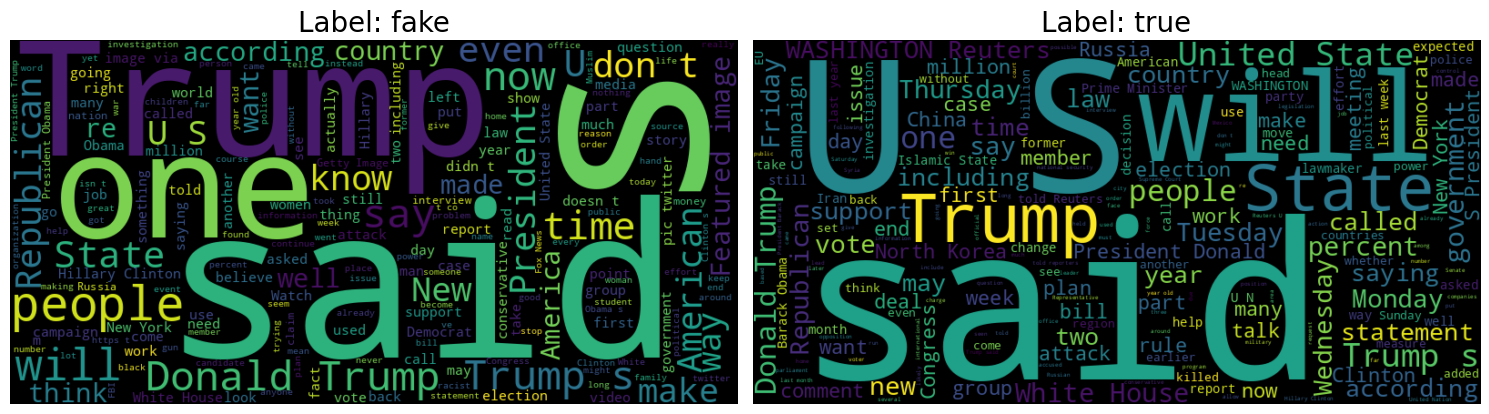

In [ ]:
wordcloud_show(df, 'text')

## Text Cleansing

In [ ]:
def tekt_cleansing(text):
  # Lower all case
  text = text.lower()

  # Non-alphabet character removal
  text = re.sub('[^a-z]', ' ', text)

  rem = ['said', 'reuters']

  # Remove multiple whitespace
  text = ' '.join(text.split())

  # Stopwords Removal and Lemmatization
  sw = stopwords.words('english')
  lem = WordNetLemmatizer()
  text = ' '.join(lem.lemmatize(word) for word in word_tokenize(text)
  if not word in sw and not word in rem)

  return text

def tokenization(text):
  return word_tokenize(text)

# Subject column is dropped because it should be nothing to do with the fact that whether a news is fake or not.
df_clean = df.copy().drop(columns = ['title', 'subject', 'date'])
df_clean['clean_text'] = df_clean['text'].apply(tekt_cleansing)
df_clean['token'] = df_clean['clean_text'].apply(tokenization)

df_clean = df_clean[['text', 'clean_text', 'token', 'label']]

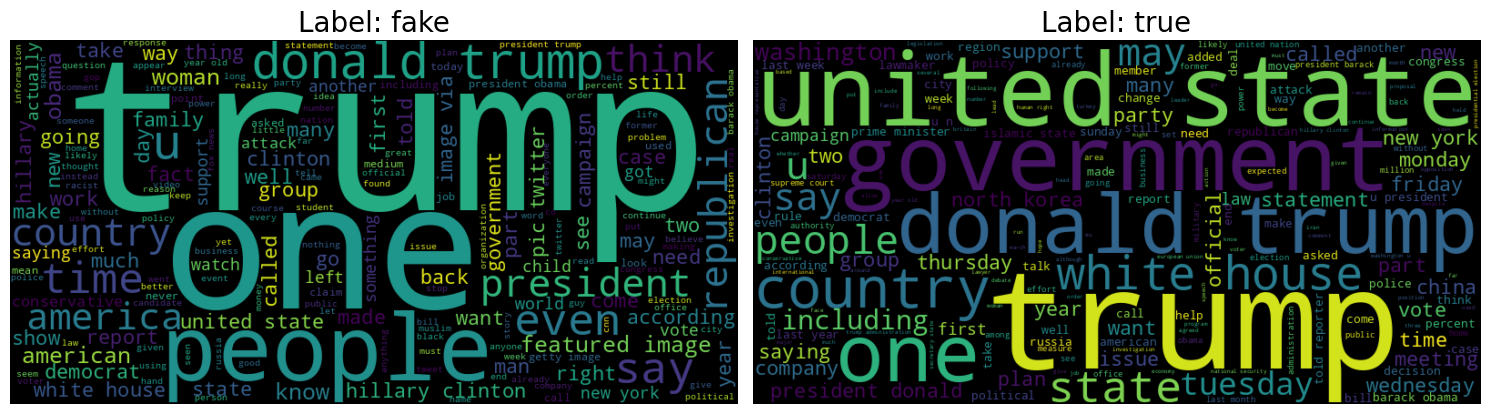

In [ ]:
wordcloud_show(df_clean, 'clean_text')

##Second Duplicated Data Cleansing

In [ ]:
df_clean[['clean_text', 'label']].duplicated().sum()

547

In [ ]:
df_clean2 = df_clean.copy()
df_clean2.drop_duplicates(subset = ['clean_text', 'label'], inplace = True)

max_word = len(max(df_clean2['token'], key = len))
avg_word = round(sum(len(x) for x in df_clean2['token'])/len(df_clean2['token']))

print(f'max word : {max_word}')
print(f'avg word : {avg_word}')

max word : 4964
avg word : 231


##Data Splitting

In [ ]:
x_train, x_val, y_train, y_val = tts(
    df_clean2['token'],
    df_clean2['label'],
    test_size = .4,
    random_state = SEED,
    stratify = df_clean2['label']
)

x_val, x_test, y_val, y_test = tts(
    x_val,
    y_val,
    test_size = .5,
    random_state = SEED,
    stratify = y_val
)

## Vectorization

We use word2vec - skipgram as the method of vectorization

In [ ]:
vector_size = 250
def word2vec_sgr(text, vector_size = 250):
  sgr = Word2Vec(text,
                 min_count = 1,
                 vector_size = vector_size,
                 window = avg_word,
                 sg = 1)
  vocab = set(sgr.wv.index_to_key)

  return sgr, vocab

sgr, vocab = word2vec_sgr(x_train, vector_size)

sgr_dict = {}
for i in vocab:
  sgr_dict[i] = sgr.wv.get_vector(i)

print("The no of key-value pairs : ", len(sgr_dict))

The no of key-value pairs :  45315


If we want to save the learned vectors to a file, we use `.save`. This saves time as we have a pretrained set of vectors we can use

In [ ]:
sgr.save("word2vec_model.bin")

We can load it again with

In [ ]:
#sgr = Word2Vec.load("word2vec_model.vec")

#Tokenization and Padding

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(x_train)

max_word_len = max_word
vocab_size = len(tok.word_index) + 100
embed_dim = vector_size

def tnp(text):
  # Tokenization
  text = tok.texts_to_sequences(text)
  # Padding
  text = pad_sequences(text,
                       maxlen = max_word_len,
                       padding = 'post')

  return text

embed_matrix = np.zeros((vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector = sgr_dict.get(word)
  if embed_vector is not None:
    embed_matrix[i] = embed_vector

#Modelling and Evaluation

In [ ]:
x_train2 = tnp(x_train)
x_val2 = tnp(x_val)
x_test2 = tnp(x_test)

map_dict = {'fake': 0,
            'true': 1}
y_train2 = y_train.map(map_dict)
y_val2 = y_val.map(map_dict)
y_test2 = y_test.map(map_dict)

def model(model, x_train, y_train, x_val, y_val):
  model.fit(x_train, y_train)
  pred = model.predict(x_val)
  report = cr(y_val, pred)
  return model, pred, report

## SVM

In [ ]:
svm_model, svm_pred, svm_report = model(SVC(),
                                        x_train2,
                                        y_train,
                                        x_test2,
                                        y_test)
print(svm_report)
print(cm(y_test, svm_pred))

              precision    recall  f1-score   support

        fake       0.66      0.57      0.61      1068
        true       0.62      0.70      0.66      1065

    accuracy                           0.64      2133
   macro avg       0.64      0.64      0.64      2133
weighted avg       0.64      0.64      0.64      2133

[[610 458]
 [317 748]]


## Random Forest

In [ ]:
rf_model, rf_pred, rf_report = model(rf(n_jobs = -1, random_state = SEED),
                                      x_train2,
                                      y_train,
                                      x_test2,
                                      y_test)
print(rf_report)
print(cm(y_test, rf_pred))

              precision    recall  f1-score   support

        fake       0.65      0.72      0.68      1068
        true       0.69      0.61      0.65      1065

    accuracy                           0.67      2133
   macro avg       0.67      0.67      0.67      2133
weighted avg       0.67      0.67      0.67      2133

[[770 298]
 [414 651]]


##Histogram Gradient Boosting

In [ ]:
hist_model, hist_pred, hist_report = model(hist(random_state = SEED),
                                            x_train2,
                                            y_train,
                                            x_test2,
                                            y_test)
print(hist_report)
print(cm(y_test, hist_pred))

              precision    recall  f1-score   support

        fake       0.87      0.83      0.85      1068
        true       0.83      0.88      0.86      1065

    accuracy                           0.85      2133
   macro avg       0.85      0.85      0.85      2133
weighted avg       0.85      0.85      0.85      2133

[[883 185]
 [129 936]]


## Hyperparameter Tuning (Histogram Gradient Boosting)

In [ ]:
# hist_param = {
#     'learning_rate': uniform(0.01, 0.2),
#     'max_iter': randint(100, 500),
#     'max_leaf_nodes': randint(20, 50),
#     'min_samples_leaf': randint(1, 20),
#     'l2_regularization': uniform(0.0, 1.0),
#     'max_bins': randint(2, 255)
# }

# hist_tuned = RandomizedSearchCV(
#     hist(random_state = SEED),
#     param_distributions = hist_param,
#     n_iter = 20,
#     cv = 3,
#     verbose = 2,
#     random_state = SEED,
#     n_jobs = -1
# )

# hist_tuned_pred = hist_tuned.fit(x_train2, y_train2)
# hist_tuned_pred = hist_tuned.predict(x_test2)
# hist_tuned_report = cr(y_test2, hist_tuned_pred, target_names = list(map_dict.keys()))
# print(hist_tuned_report)
# print(cm(y_test2, hist_tuned_pred))
# print(hist_tuned.best_params_)

##LSTM Model

In [ ]:
tf.random.set_seed(SEED)
np.random.seed(SEED)

lstm_model = Sequential([
    Embedding(
        input_dim = vocab_size,
        output_dim = embed_dim,
        input_length = max_word_len,
        weights = [embed_matrix],
        mask_zero = True,
        trainable = False
    ),

    LSTM(avg_word  + 16, return_sequences = True),
    LayerNormalization(),

    # We only use one layer of LSTM as two layers of LSTM causing Out of Memory (OoM)
    # LSTM(avg_word  + 2, return_sequences = True),
    # LayerNormalization(),

    GlobalMaxPooling1D(),
    Dense(1, 'sigmoid')
])

lstm_model.compile(optimizer =  tf.optimizers.Adam(learning_rate = 4e-4),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4964, 250)         11353750  
                                                                 
 lstm (LSTM)                 (None, 4964, 247)         492024    
                                                                 
 layer_normalization (Layer  (None, 4964, 247)         494       
 Normalization)                                                  
                                                                 
 global_max_pooling1d (Glob  (None, 247)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 248       
                                                                 
Total params: 11846516 (45.19 MB)
Trainable params: 4927

In [ ]:
callbacks = EarlyStopping(monitor = 'val_loss',
                          patience = 6,
                          restore_best_weights = True)

history = lstm_model.fit(
    x_train2,
    y_train2,
    epochs = 25,
    batch_size = 100,
    validation_data = (x_val2, y_val2),
    callbacks = callbacks
)

Epoch 1/25
64/64 [==============================] - 21s 233ms/step - loss: 0.2473 - accuracy: 0.8962 - val_loss: 0.1215 - val_accuracy: 0.9545
Epoch 2/25
64/64 [==============================] - 11s 179ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0990 - val_accuracy: 0.9583
Epoch 3/25
64/64 [==============================] - 13s 197ms/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0888 - val_accuracy: 0.9662
Epoch 4/25
64/64 [==============================] - 13s 199ms/step - loss: 0.0352 - accuracy: 0.9902 - val_loss: 0.0807 - val_accuracy: 0.9700
Epoch 5/25
64/64 [==============================] - 11s 179ms/step - loss: 0.0278 - accuracy: 0.9941 - val_loss: 0.0914 - val_accuracy: 0.9644
Epoch 6/25
64/64 [==============================] - 12s 191ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.0816 - val_accuracy: 0.9705
Epoch 7/25
64/64 [==============================] - 12s 196ms/step - loss: 0.0150 - accuracy: 0.9975 - val_loss: 0.0854 - val_accuracy: 0.9695

In [ ]:
lstm_pred = lstm_model.predict(x_test2)
lstm_pred = np.round(lstm_pred)
lstm_report = cr(y_test2, lstm_pred, target_names = list(map_dict.keys()))
print(lstm_report)
print(cm(y_test2, lstm_pred))

67/67 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

        fake       0.99      0.96      0.97      1068
        true       0.96      0.99      0.97      1065

    accuracy                           0.97      2133
   macro avg       0.97      0.97      0.97      2133
weighted avg       0.97      0.97      0.97      2133

[[1026   42]
 [  15 1050]]


###Hyperparameter Tuning

In [ ]:
# Create a template for the model, inspired from the successful of its predecesspr
def generate_model(lstm_size, lr):
  tf.random.set_seed(SEED)
  np.random.seed(SEED)

  lstm_model = Sequential([
      Embedding(
          input_dim = vocab_size,
          output_dim = embed_dim,
          input_length = max_word_len,
          weights = [embed_matrix],
          mask_zero = True,
          trainable = False
      ),

      LSTM(lstm_size, return_sequences = True),
      LayerNormalization(),

      GlobalMaxPooling1D(),
      Dense(1, 'sigmoid')
  ])

  lstm_model.compile(optimizer =  tf.optimizers.Adam(learning_rate = lr),
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

  lstm_model.summary()

  callbacks = EarlyStopping(monitor = 'val_loss',
                          patience = 6,
                          restore_best_weights = True)

  history = lstm_model.fit(
      x_train2,
      y_train2,
      epochs = 25,
      batch_size = 100,
      validation_data = (x_val2, y_val2),
      callbacks = callbacks
  )

  return lstm_model, history

def lstm_predict(lstm_model):
  lstm_pred = lstm_model.predict(x_test2)
  lstm_pred = np.round(lstm_pred)
  lstm_report = cr(y_test2, lstm_pred, target_names = list(map_dict.keys()))
  print(lstm_report)
  print(cm(y_test2, lstm_pred))

In [ ]:
lstm_model2, history2 = generate_model(avg_word + 16, 8e-4)
lstm_model3, history3 = generate_model(avg_word + 16, 2e-4)

lstm_2nd_model, history_21 = generate_model(350, 4e-4)
lstm_2nd_model2, history_22 = generate_model(350, 8e-4)
lstm_2nd_model3, history_23 = generate_model(350, 2e-4)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4964, 250)         11353750  
                                                                 
 lstm_1 (LSTM)               (None, 4964, 247)         492024    
                                                                 
 layer_normalization_1 (Lay  (None, 4964, 247)         494       
 erNormalization)                                                
                                                                 
 global_max_pooling1d_1 (Gl  (None, 247)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_1 (Dense)             (None, 1)                 248       
                                                                 
Total params: 11846516 (45.19 MB)
Trainable params: 49

In [ ]:
print('First Generation')
print('model 1')
lstm_predict(lstm_model)
print('model 2')
lstm_predict(lstm_model2)
print('model 3')
lstm_predict(lstm_model3)

print('\nSecond Generation')
print('model 1')
lstm_predict(lstm_2nd_model)
print('model 2')
lstm_predict(lstm_2nd_model2)
print('model 3')
lstm_predict(lstm_2nd_model3)

First Generation
model 1
67/67 [==============================] - 2s 19ms/step
              precision    recall  f1-score   support

        fake       0.99      0.96      0.97      1068
        true       0.96      0.99      0.97      1065

    accuracy                           0.97      2133
   macro avg       0.97      0.97      0.97      2133
weighted avg       0.97      0.97      0.97      2133

[[1026   42]
 [  15 1050]]
model 2
67/67 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

        fake       0.97      0.98      0.97      1068
        true       0.98      0.97      0.97      1065

    accuracy                           0.97      2133
   macro avg       0.97      0.97      0.97      2133
weighted avg       0.97      0.97      0.97      2133

[[1043   25]
 [  29 1036]]
model 3
67/67 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

        fake       0.98      0.96 